# Obtain detuning from FID

In [31]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/ben_ruobin_nmr_feb02/")

In [32]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [37]:
FIDData = pd.read_csv(rel_path / "single_take.csv", header = None)
chan1 = FIDData[1].values
chan2 = FIDData[2].values
tlist = FIDData[0].values

chan1 = np.subtract(chan1, np.mean(chan1[2000:]))
chan2 = np.subtract(chan2, np.mean(chan2[2000:]))


trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))

In [38]:
peaks, _ = sc.signal.find_peaks(
    np.square(trans_mag),
   height = 1.8,
    #prominence = .5,
)

In [39]:
peaks

array([ 100,  600, 1100, 1600, 2100])

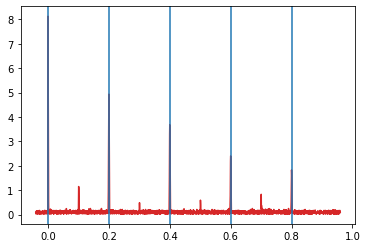

In [40]:
plt.plot(tlist,trans_mag, color = "tab:red")
for peak in peaks:
    plt.axvline(tlist[peak])

In [22]:
data_dir = rel_path

In [23]:
data = [(tlist[peak],trans_mag[peak]) for peak in peaks]

In [24]:
times, heights = zip(*sorted(data))

In [28]:
def gaussian(t, A, sigma, mu):
    return A * np.exp(-(t-mu)**2/(2*sigma**2))

def cos(t, A, omega, c):
    return A * np.cos(omega*(t-c))

def exp(t, A, b):
    return A*np.exp(-t*b)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(exp, times, heights, p0=[7, .007])

Text(0, 0.5, 'echo amplitdue (V)')

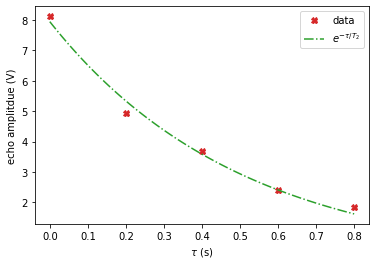

In [26]:
plt.plot(times, heights, marker = "X", linestyle = "None", color = "tab:red", label = "data")
xlist = np.linspace(min(times), max(times), 100)
plt.plot(xlist, [exp(x, *popt) for x in xlist], color = "tab:green", linestyle = "-.", label = r"$e^{-\tau/T_2}$")
plt.legend()
plt.xlabel(r"$\tau$ (s)")
plt.ylabel("echo amplitdue (V)")

In [30]:
1/popt[1]

0.5018559287525204